The data is being pulled from the Binance API.
The information to pull data can be found here:
- [https://docs.binance.us/#trade-data](https://docs.binance.us/#trade-data)
- [https://www.binance.us/institutions/market-history](https://www.binance.us/institutions/market-history)

In [79]:
import requests
import zipfile
import io
import pandas as pd

from datetime import datetime, timedelta

URL = "https://data.binance.us/public_data/spot/daily/klines/BTCUSDT/1m/BTCUSDT-1m-"

dates = [(datetime.now() - timedelta(days=i)).strftime("%Y-%m-%d") for i in range(1, (365 + 367))]
dates.reverse()

for date in dates:
    req_start = datetime.now()
    with requests.Session() as s:
        response = s.get(f'{URL}{date}.zip')
    
    if response.status_code == 200:
        zip_file = io.BytesIO(response.content)
    
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            csv_filename = zip_ref.namelist()[0]
            with zip_ref.open(csv_filename) as csv_file:
                df = pd.read_csv(csv_file)
    
        df.to_csv(f'{date}.csv', index=False)

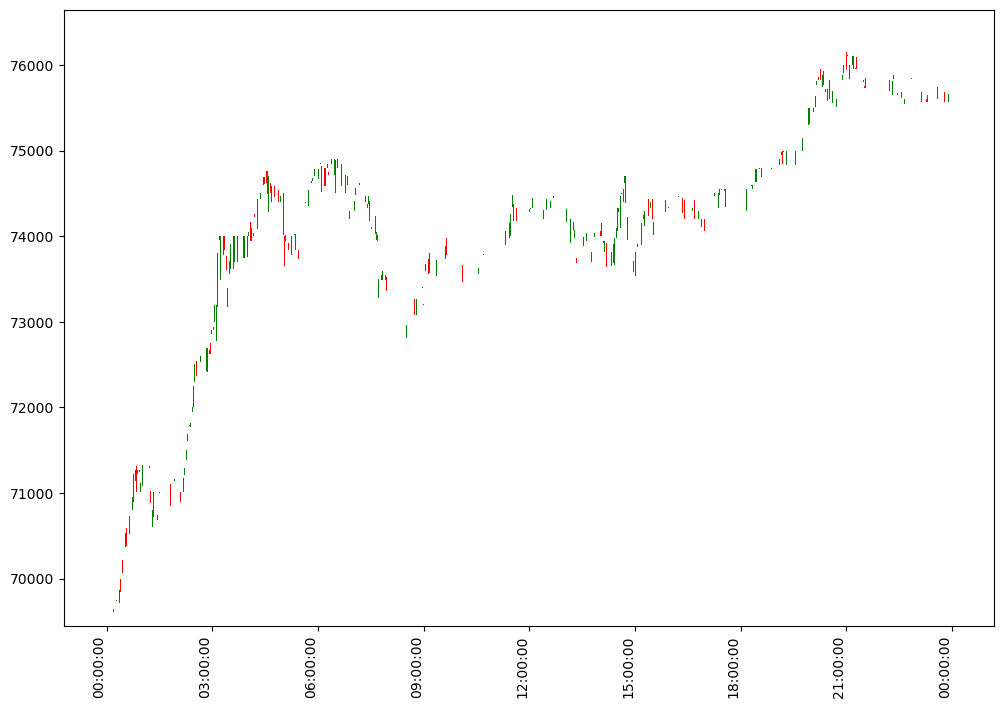

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

FILE = "2024-11-06.csv"

prices = pd.read_csv(FILE).copy()[["open_time", "high", "low", "open", "close"]]
prices["open_time"] = [pd.to_datetime(t, utc=True, unit="ms") for t in prices["open_time"]]
prices = prices.sort_values("open_time")

up = prices[prices.close >= prices.open]
down = prices[prices.open > prices.close]

width = .0005
width2 = .00025

plt.figure(figsize=(12, 8))

plt.bar(up.open_time, up.close-up.open, width, bottom=up.open, color='green')
plt.bar(up.open_time, up.high-up.close, width2, bottom=up.close, color='green')
plt.bar(up.open_time, up.low-up.open, width2, bottom=up.open, color='green')

plt.bar(down.open_time, down.close-down.open, width, bottom=down.open, color='red')
plt.bar(down.open_time, down.high-down.open, width2, bottom=down.close, color='red')
plt.bar(down.open_time, down.low-down.close, width2, bottom=down.open, color='red')

plt.xticks(rotation=90, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%H:%M:%S"))

plt.show()